In [42]:
import pandas as pd
import numpy as np

In [43]:
#import data set
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [45]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [47]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
testcategorical_cols = test_df.select_dtypes(include=['object']).columns

numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns


train_df[categorical_cols] = train_df[categorical_cols].fillna(train_df[categorical_cols].mode().iloc[0])
test_df[testcategorical_cols] = test_df[testcategorical_cols].fillna(test_df[testcategorical_cols].mode().iloc[0])

train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())
test_df[numeric_cols] = test_df[numeric_cols].fillna(test_df[numeric_cols].median())


train_df.isnull().sum()
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [48]:
train_df = train_df.drop(train_df[['Loan_ID']], axis=1)
test_df = test_df.drop(test_df[['Loan_ID']], axis=1)

In [49]:
!pip install matplotlib
!pip install seaborn

<Axes: >

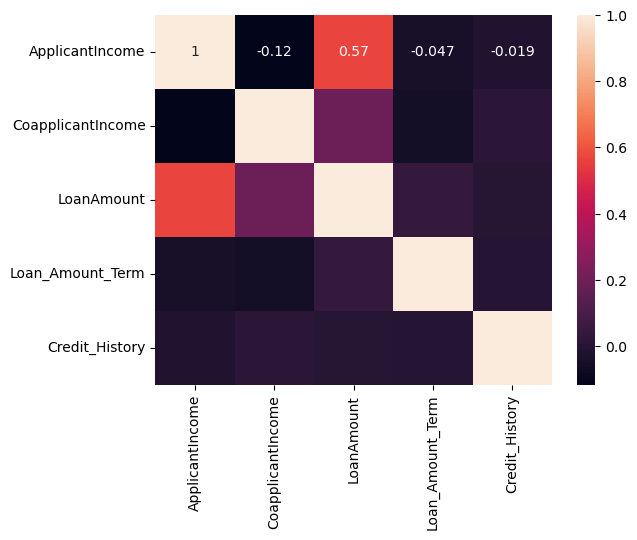

In [50]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns

corr = train_df[numeric_cols].corr()
sns.heatmap(corr, annot=True)


In [51]:
!pip install scikit-learn

In [52]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [53]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
testcategorical_cols = test_df.select_dtypes(include=['object']).columns




In [54]:
print(train_df[categorical_cols].columns)
print(test_df[testcategorical_cols].columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [56]:
from sklearn.preprocessing import LabelEncoder

# Loop through categorical columns
for col in categorical_cols:
    labelencoder = LabelEncoder() 

    train_df[col] = labelencoder.fit_transform(train_df[col])
    if col in testcategorical_cols: 
        test_df[col] = labelencoder.transform(test_df[col])


In [57]:
X= train_df.drop(train_df[['Loan_Status']], axis=1)
y = train_df[['Loan_Status']]


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=30)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {'logistic' : LogisticRegression()}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_val)
    print(name)
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred, average='weighted'))
    print("Recall:", recall_score(y_val, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

logistic
Accuracy: 0.7945945945945946
Precision: 0.792522957740349
Recall: 0.7945945945945946
F1 Score: 0.7654492330168007
Confusion Matrix:
 [[ 18  33]
 [  5 129]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
import pickle

pickle.dump(model,open('model.pkl', 'wb'))

In [61]:
model

LogisticRegression()